# Sitzung 1

Diese Skripte sind ausschließlich als Zusatz-Material gedacht. Speziell für diejenigen unter Euch, die einen Einblick in das Programmieren gewinnen wollen. Wenn Du es also leid bist repetitive Tätigkeiten auszuführen und das lieber einer Maschine überlassen willst, bist Du hier genau richtig. 

<span style="color:red"> Die Codes sind nicht für die Klausur relevant, genau genommen haben sie mit dem Lehrstuhl für Statistik **rein gar nichts** zu tun. </span>

## Aufgabe 5-1: Kinder

Als erstes überprüfen wir, wie viele Kombinationen maximal möglich sind. Da uns die Reihenfolge nicht interessiert, verwenden wir den Binomialkoeffizienten. Glücklicherweise ist dieser bereits in dem `scipy` Modul implementiert. Um die Funktion benutzen zu können, müssen wir sie zunächst in unsere Sitzung importieren.

In [2]:
from scipy.special import binom
# Anzahl Möglichkeiten: Binomialkoeffizient
max_comb = binom(6, 3)
print(max_comb)

20.0


Um eine Lösung für unser Problem zu finden, müssen wir eine Formulierung finden, die mit den eingebauten Datenstrukturen kompatibel ist. Die einfachste Form mehrere Objekte zu speichern, ist eine Liste. Listen werden in Python mit eckigen Klammern deklariert. Will man hingegen Werte speichern, die auf andere Werte verweisen, bieten sich `dictionaries` an. Man sagt auch, `dictionaries` seien sogenannte **lookup-tables**. Wir werden ein solches `dictionary` verwenden, um schnell von einer Person auf die Anzahl ihrer Kinder zugreifen zu können.

In [3]:
persons = ["P1", "P2", "P3", "P4", "P5", "P6"]
children = [6, 2, 0, 1, 2, 1]
persons2children = dict(zip(persons, children))

Zunächst speichern wir alle möglichen permutationen der Länge 3 in einer Liste. Indem wir den Typ aller Permutationen zu einem `set` ändern, sagen wir Python das uns die Reihenfolge der Personen egal ist.

In [4]:
import itertools
permutations = [set(x) for x in itertools.permutations(persons, 3)]
print(len(permutations))

120


120?! Das sind viel mehr als 20. Das liegt daran, dass der eingebaute Befehl auf die Reihenfolge der Personen achtet, und unsere Änderungen mithilfe des `set` Befehls keine Einträge gelöscht hat. Wir müssen das unbedingt korrigieren. 

Und wenn wir schon dabei sind, können wir gleich die möglichen Ergebnisse der Zufallsvariablen $X$ berechnen.

In [5]:
X = {}
for perm in permutations:
    sum_children = sum([persons2children[p] for p in perm])
    if sum_children not in X:
        X[sum_children] = [perm]
    elif perm not in X[sum_children]:
        X[sum_children].append(perm)
        
# Die 6 müssen wir manuell hinzufügen, da sie sonst nicht auftauchen kann.
X[6] = []

### Wahrscheinlichkeitsfunktion

Jetzt müssen wir nur noch die Wahrscheinlichkeiten und errechnen und deren kumulierte Summe für die Verteilungsfunktion bilden. Für die Wahrscheinlichkeitsfunktion werden wir eine Schleife über die Inhalte unseres `dictionaries` bilden. Schließlich hatten wir für jedes Ereignis von X die Ergebnisse gespeichert. Wir können diese jetzt einfach zählen und durch die Gesamtanzahl der Ergebnisse (20) teilen.



In [6]:
probabilities = [(x, len(results) / max_comb) for x, results in X.items()]

Das Modul `pandas` bietet uns eine schöne (und nützliche) Tabellen-Struktur. Wir werden daher die Wahrscheinlichkeiten in einen sogenannten `DataFrame` als Spalte speichern.

Die kumulierten Wahrscheinlichkeiten kann man mit dem Befehl `cumsum` aus dem `numpy` Modul berechen, auch diese speichern wir als Spalte ab.

Abschließend lassen wir uns den `DataFrame` im Querformat auswerfen.

In [7]:
import pandas as pd

# Der Index sorgt später für bedeutungsvolle labels
X = pd.DataFrame(probabilities,
                 columns=["x", "P(X=x)"]).set_index("x").sort_index()
X["F(x)"] = X["P(X=x)"].values.cumsum()
X.T

x,2,3,4,5,6,7,8,9,10
P(X=x),0.05,0.20,0.15,0.1,0.0,0.1,0.15,0.20,0.05
F(x),0.05,0.25,0.40,0.5,0.5,0.6,0.75,0.95,1.00


Um Graphiken und Plots zu zeichnen, haben wir zwei Möglichkeiten. Am einfachsten ist es, die `plot`-Methode eines `DataFrames` zu benutzen. Für die gängigsten Anwendungen ist das ausreichend und vor allem schnell erledigt.

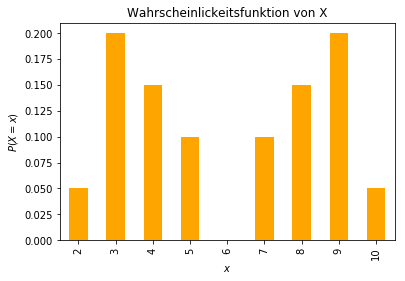

In [47]:
from matplotlib import pyplot as plt
# Plot pdf
X["P(X=x)"].plot(kind="bar",
                 color="orange",
                 title="Wahrscheinlickeitsfunktion von X")
plt.xlabel(r"$x$")
plt.ylabel(r"$P(X=x)$")
plt.show()

### Verteilungsfunktion

Manche Plots werden hingegen eher selten verwendet (und empirische Verteilungsfunktionen sind so eine Seltenheit). Daher muss man auf die Standard-Plotting-Bibliothek `pyplot` zurückgreifen. Damit ist dann aber so gut wie alles möglich :)

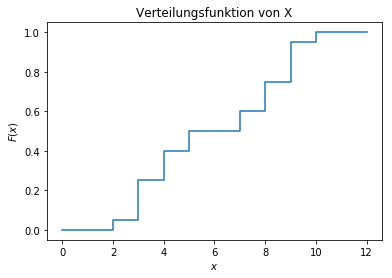

In [38]:
x = [0, *X.index.values.tolist(), 12]
y = [0, *X["F(x)"].values.tolist(), 1.0]

plt.step(x, y, where="post")
plt.xlabel(r"$x$")
plt.ylabel(r"$F(x)$")
plt.title("Verteilungsfunktion von X")
plt.show()